In [1]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd
import numpy as np
import os
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# importing all libraries required

In [2]:
_input = Input((224,224,3))  #INPUT IMAGE SHAPE

#building up the VGG-16 model
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)
# Working with a model that has already been trained(pretrained)

In [3]:
# Download a cat image from the internet
!wget https://www.rd.com/wp-content/uploads/2021/01/GettyImages-1175550351.jpg -O cat_image.jpg

img_path = "/content/cat_image.jpg"

--2024-12-25 17:09:44--  https://www.rd.com/wp-content/uploads/2021/01/GettyImages-1175550351.jpg
Resolving www.rd.com (www.rd.com)... 104.18.0.117, 104.18.1.117, 2606:4700::6812:175, ...
Connecting to www.rd.com (www.rd.com)|104.18.0.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254259 (248K) [image/jpeg]
Saving to: ‘cat_image.jpg’

cat_image.jpg       100%[===================>] 248.30K  --.-KB/s    in 0.03s   

2024-12-25 17:09:44 (7.31 MB/s) - ‘cat_image.jpg’ saved [254259/254259]



In [4]:
def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [5]:
def _get_predictions(_model, img_path):
    plt.imshow(Image.open(img_path))
    plt.show()
    img = _load_image(img_path)
    preds  = decode_predictions(_model.predict(img), top=3)[0]
    df = pd.DataFrame(preds, columns=['prediction','name','probability'])
    print(df)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


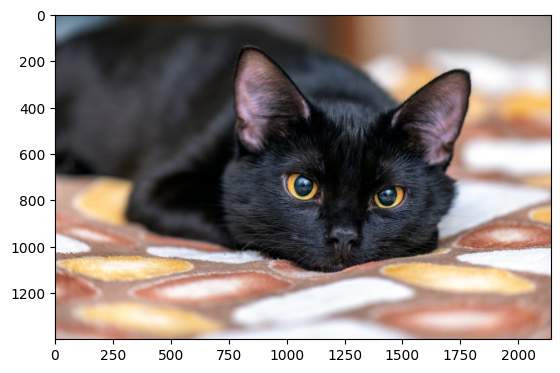

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
  prediction          name  probability
0  n02124075  Egyptian_cat     0.265056
1  n02104365    schipperke     0.184169
2  n02971356        carton     0.100336


In [6]:
vgg16_weights = '../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights='imagenet')
_get_predictions(vgg16_model, img_path)